In [1]:
from typing import TypedDict

class State(TypedDict):
    graph_state: str

** Lets define our nodes

In [2]:
def node1(state):
    print('**** NODE 1 ****')
    return {"graph_state": state['graph_state'] + "I am"}

def node2(state):
    print('**** NODE 2 ****')
    return {"graph_state": state['graph_state'] + " happy"}

def node3(state):
    print('**** NODE 3 ****')
    return {"graph_state": state['graph_state'] + " sad"}

In [3]:
import random 
from typing import Literal
def decide_mood(state) -> Literal["node2","node3"]:
    if random.random() < 0.5:
        return "node2"
    else:
        return "node3"

** Constructing graph

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

graph = StateGraph(State)
graph.add_node("node1", node1)
graph.add_node("node2", node2)
graph.add_node("node3", node3)

# Logic 
graph.add_edge(START, "node1")
graph.add_conditional_edges("node1", decide_mood)
graph.add_edge("node2", END)
graph.add_edge("node3", END)

graph = graph.compile()


/opt/anaconda3/envs/langchainAcademy/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


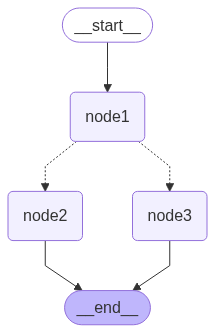

In [6]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({"graph_state": "Hi, this is Utkarsh!"})

**** NODE 1 ****
**** NODE 3 ****


{'graph_state': 'Hi, this is Utkarsh!I am sad'}